# Concrete strength EDA


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We have taken this dataset from Kaggle: https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength

In [2]:
data = pd.read_csv('../data/raw/concrete_strength.csv')

In [3]:
data.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
data.shape

(1030, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


We have 1030 samples with 8 features that affect the strength of concrete, our target to predict.

Description of fields:

- CementComponent: Amount of cement is mixed
- BlastFurnaceSlag: Amount of blast furnace slag is mixed
- FlyAshComponent: Amount of FlyAsh is mixed
- WaterComponent: Amount of water is mixed
- SuperplasticizerComponent: Amount of Super plasticizer is mixed
- CoarseAggregateComponent: Amount of Coarse Aggregate is mixed
- FineAggregateComponent: Amount of Coarse Aggregate is mixed
- AgeInDays: How many days it was left dry
- Strength **(Target)**: What was the final strength of concrete  

In [5]:
data.isna().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

## Strength

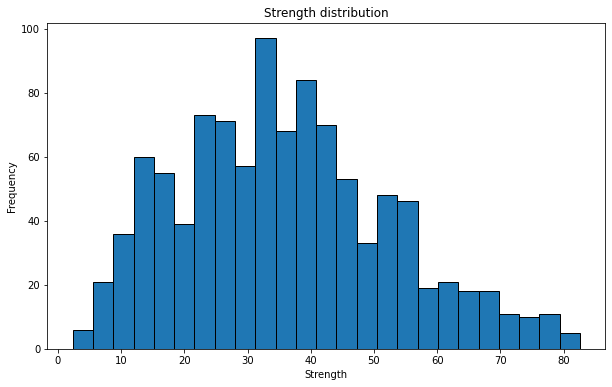

In [24]:
plt.figure(figsize=(10,6))
plt.hist(data.Strength, bins=25, edgecolor='k')
plt.title('Strength distribution')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.show()

In [26]:
data.Strength.mean()

35.81796116504851

In [28]:
data.Strength.std()

16.705741961912505

The target follows an approximately normal distribution with mean 35.82 and standard deviation 16.7. Then, probably, a part from the decision trees, linear regression will perform well. There aren't outliers in the sample.

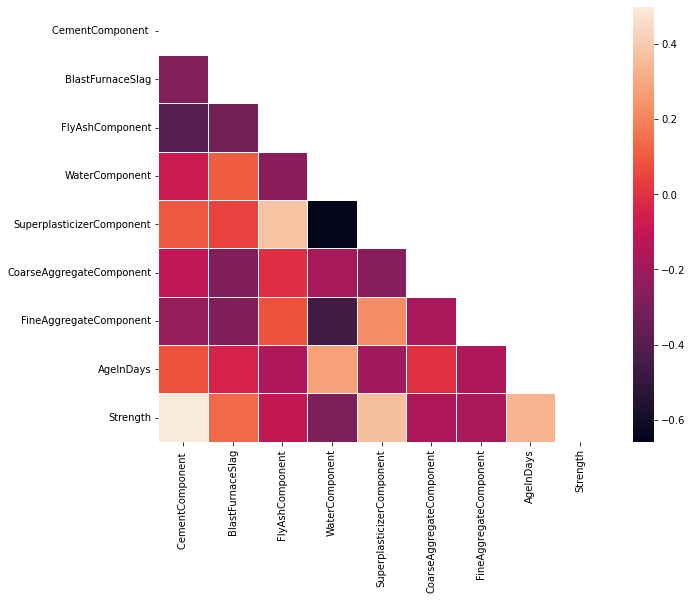

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), linewidth=0.5, mask = np.triu(np.ones_like(data.corr(), dtype=bool)))
plt.show()

We don't have any pair of variables that are very correlated. 


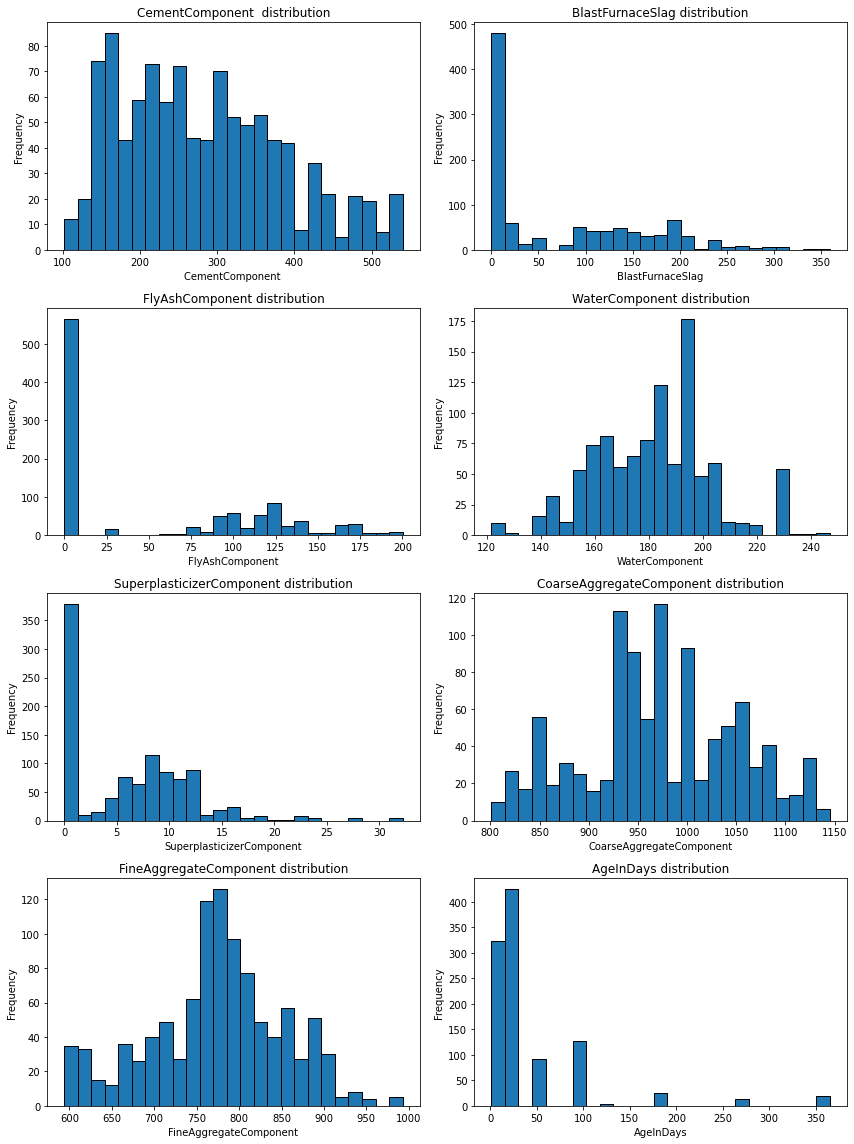

In [55]:
columns_to_plot = data.columns.drop('Strength')

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    data[column].plot(kind='hist', ax=ax, edgecolor='black', bins=25)
    ax.set_title(f'{column} distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Let's study if the features with asymmetric distributions are significant in the value of the target:

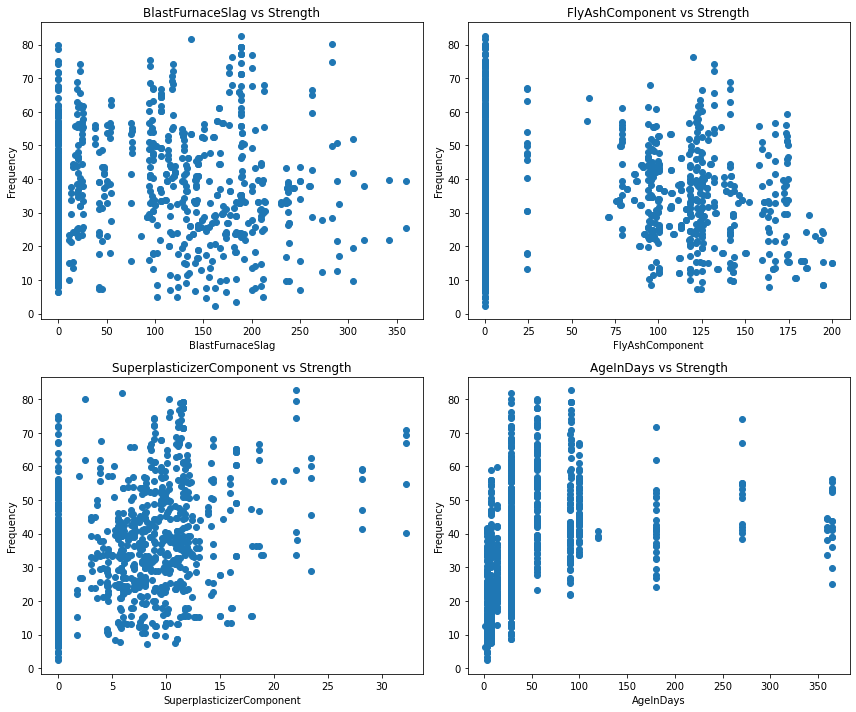

In [63]:
columns_to_plot = ['BlastFurnaceSlag', 'FlyAshComponent', 'SuperplasticizerComponent', 'AgeInDays']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.scatter(data[column], data.Strength)
    ax.set_title(f'{column} vs Strength')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Any high or low value on these variables push the target to be out of the average values, so we are not going to include new features to the dataset.